In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\10x AIMastery\Insurance-risk-analytics\SM\data\insurance.csv")

# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
# Numerical columns
numerical_cols = ['age', 'bmi', 'children', 'charges']
desc_stats = df[numerical_cols].describe()
print("Descriptive Statistics:\n", desc_stats)

# Calculate coefficient of variation (std/mean)
for col in numerical_cols:
    cv = df[col].std() / df[col].mean()
    print(f"Coefficient of Variation for {col}: {cv:.2f}")

Descriptive Statistics:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
Coefficient of Variation for age: 0.36
Coefficient of Variation for bmi: 0.20
Coefficient of Variation for children: 1.10
Coefficient of Variation for charges: 0.91


In [6]:
# Check data types
print(df.dtypes)

# Convert to categorical
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
Missing Values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Handle missing values (example: fill numerical with median, categorical with mode)
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

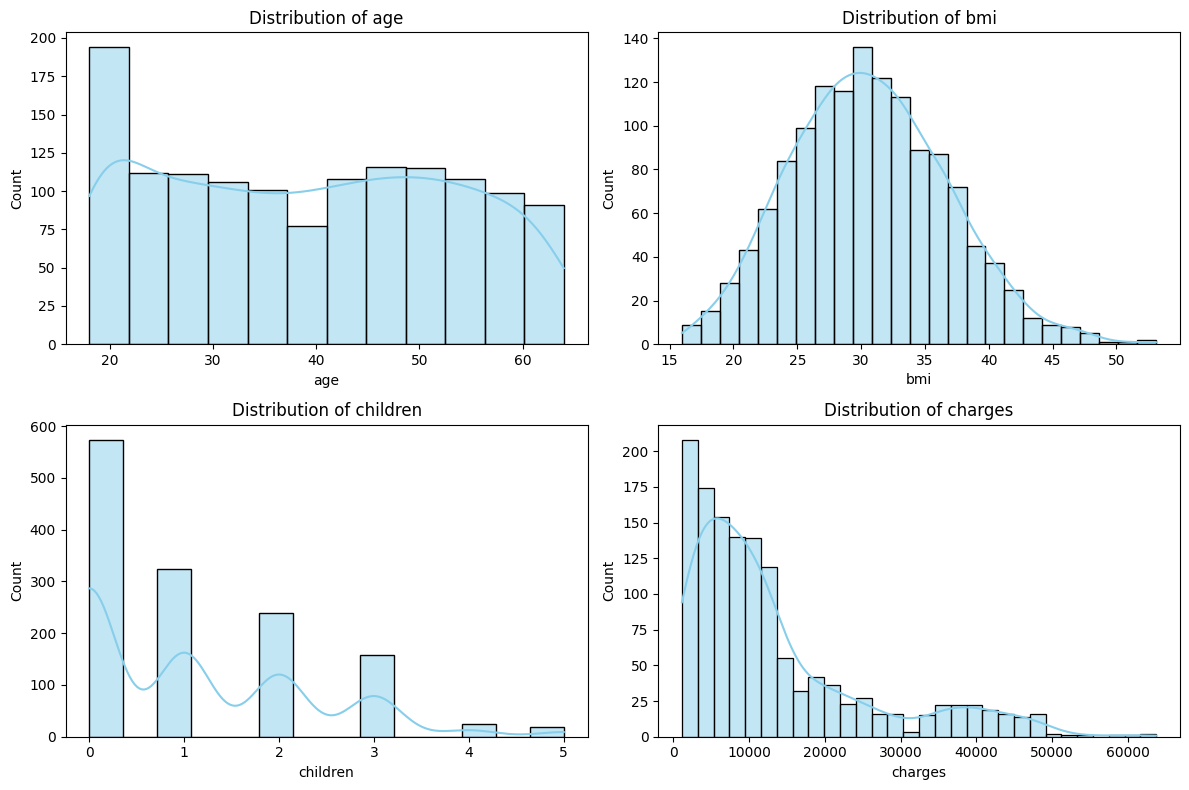

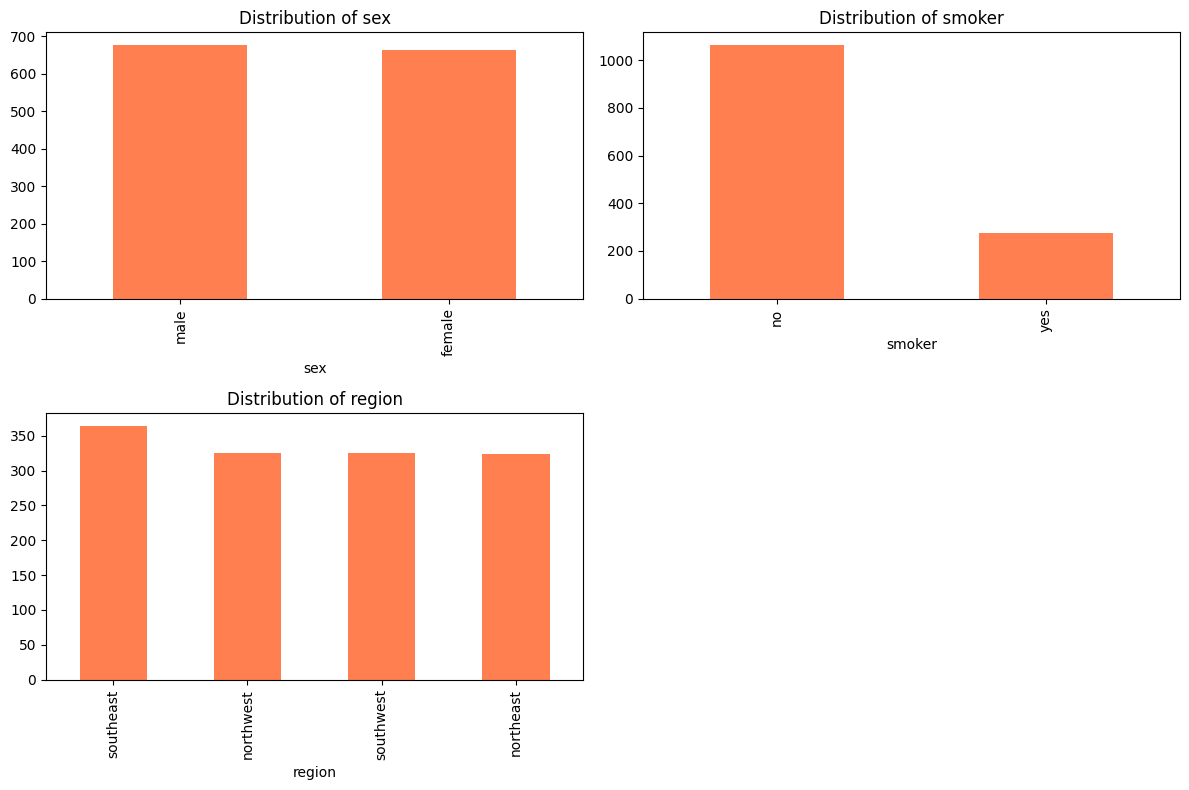

In [7]:
# Histograms for numerical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Bar charts for categorical columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    df[col].value_counts().plot(kind='bar', color='coral')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_22428\2747934833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')


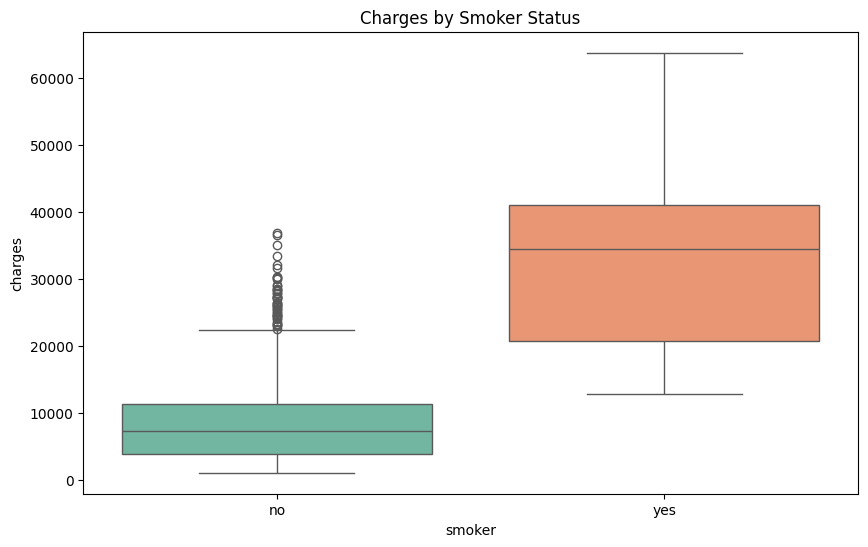

C:\Users\user\AppData\Local\Temp\ipykernel_22428\2747934833.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='charges', palette='Set3')


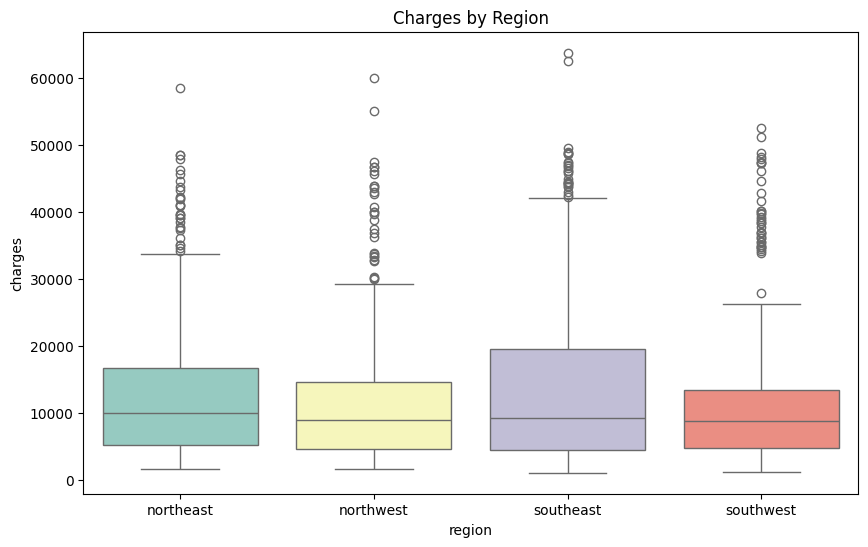

C:\Users\user\AppData\Local\Temp\ipykernel_22428\2747934833.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='charges', palette='Set1')


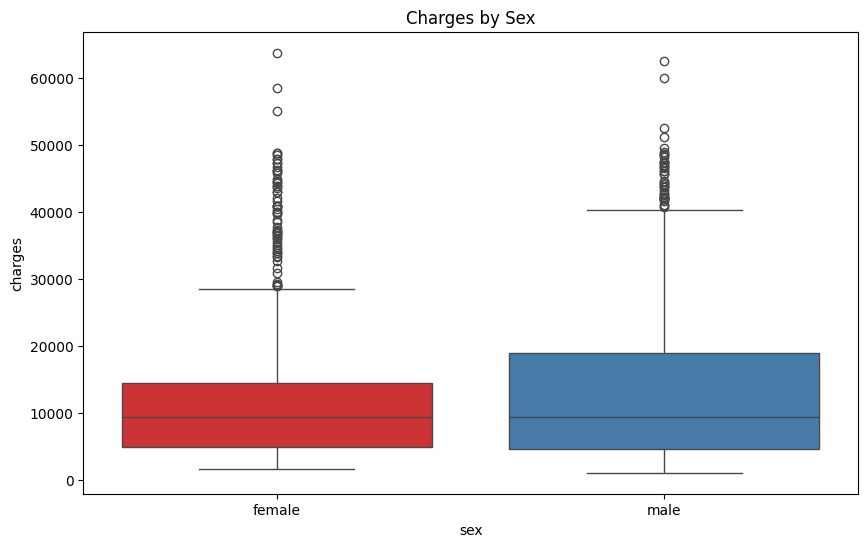

In [8]:
# Charges by smoker status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')
plt.title('Charges by Smoker Status')
plt.show()

# Charges by region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges', palette='Set3')
plt.title('Charges by Region')
plt.show()

# Charges by sex
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='charges', palette='Set1')
plt.title('Charges by Sex')
plt.show()

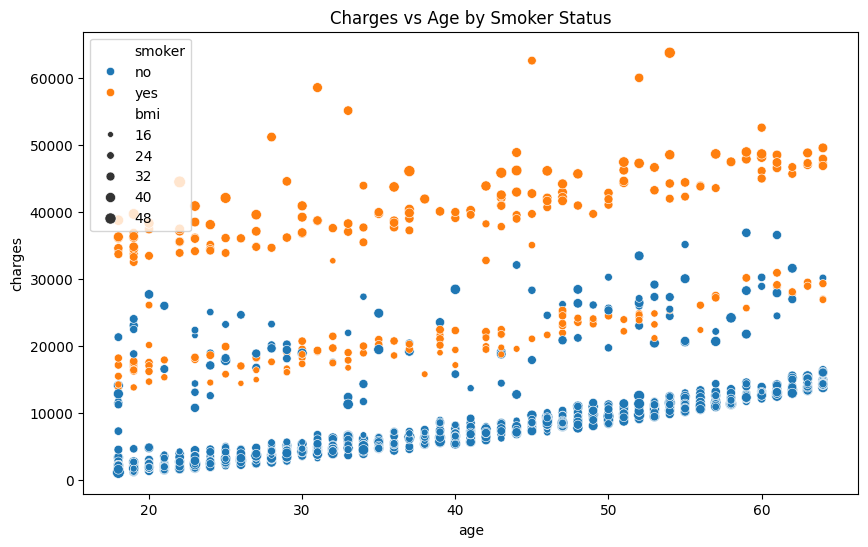

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', size='bmi')
plt.title('Charges vs Age by Smoker Status')
plt.show()

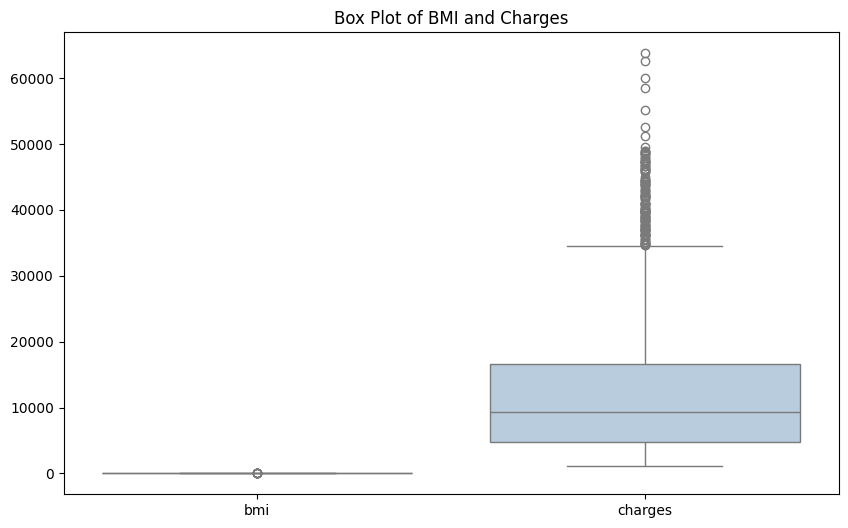

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['bmi', 'charges']], palette='Pastel1')
plt.title('Box Plot of BMI and Charges')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_22428\3227144953.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='charges', index='region', columns='smoker', aggfunc='mean')


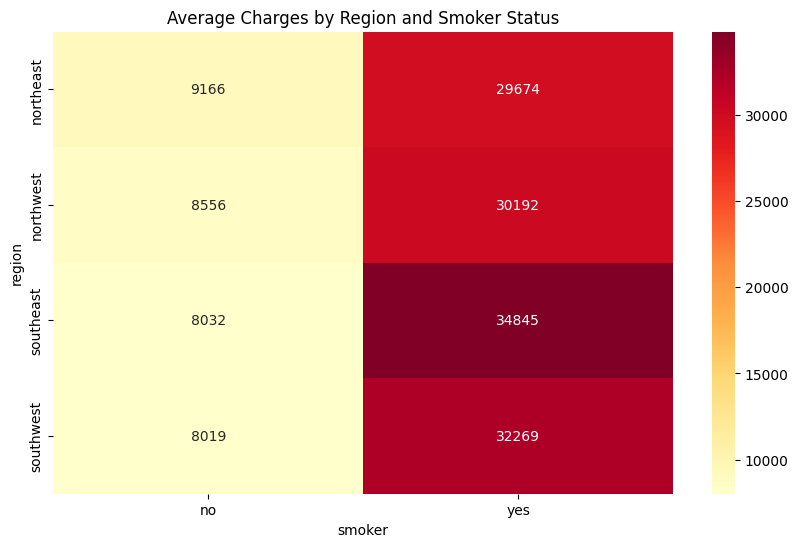

In [12]:
pivot = df.pivot_table(values='charges', index='region', columns='smoker', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='YlOrRd', fmt='.0f')
plt.title('Average Charges by Region and Smoker Status')
plt.show()

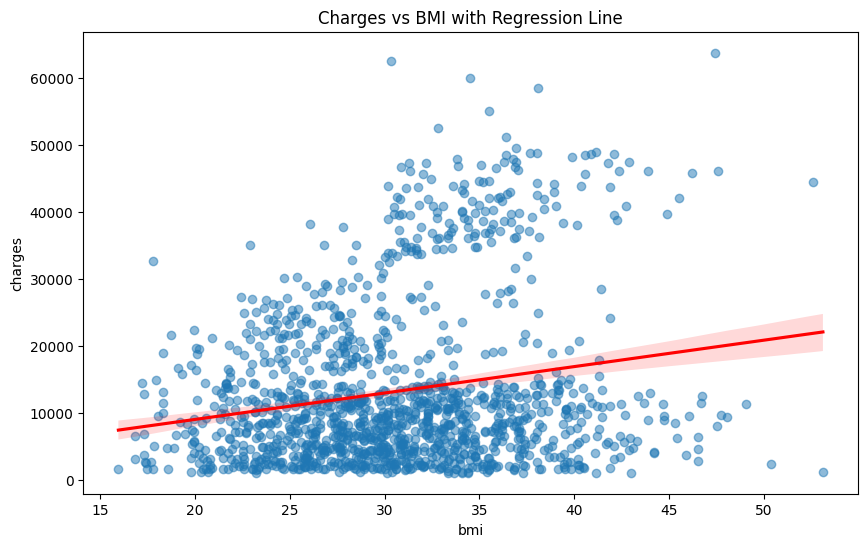

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='bmi', y='charges', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Charges vs BMI with Regression Line')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_22428\3064740997.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_by_region = df.groupby('region')['charges'].mean().sort_values(ascending=False)


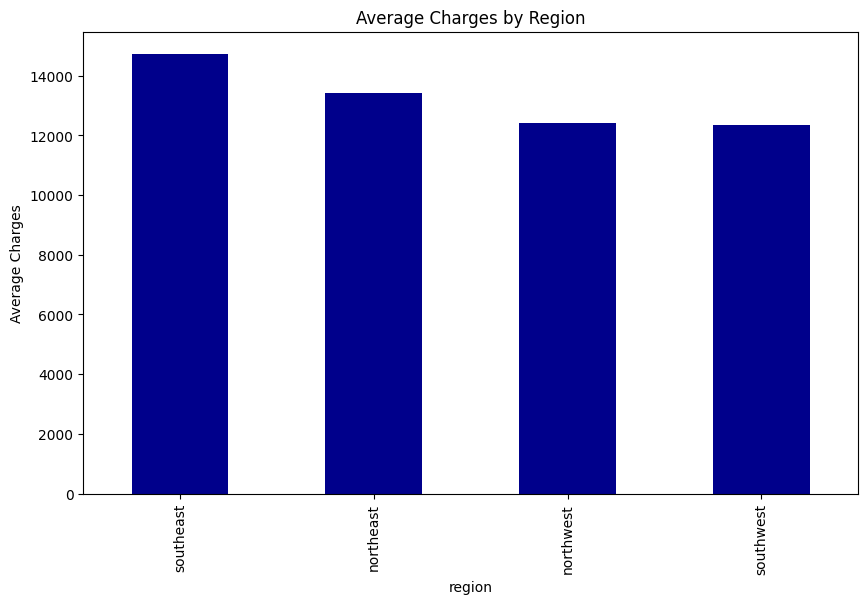

In [15]:
charges_by_region = df.groupby('region')['charges'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
charges_by_region.plot(kind='bar', color='darkblue')
plt.title('Average Charges by Region')
plt.ylabel('Average Charges')
plt.show()